In [1]:
from scipy import stats
from math import *
import numpy as np
import matplotlib.pyplot as plt

# Question 1: Gibbs Sampling Improper Prior

In [2]:
# Defining Variables
n = 30; m = 0; s = 1; C = 2; G = 10000
data = stats.norm(loc=m, scale=s).rvs(n) # Likelihood Model

# Initialize 2D arrays of zeros for theta and tau with shape (C, G)
theta = np.zeros([C, G]); tau = np.zeros([C, G])

theta[:, 0] = 1  # Inialize a value of theta

# Constructing Gibbs Sampling
for c in range(C):
    for g in range(1, G):
        tau[c, g] = stats.gamma(a=(n/2)+1, scale=2/sum((data - theta[c, g-1])**2)).rvs()
        theta[c, g] = stats.norm(loc=data.mean(), scale = s/(n)**0.5).rvs()

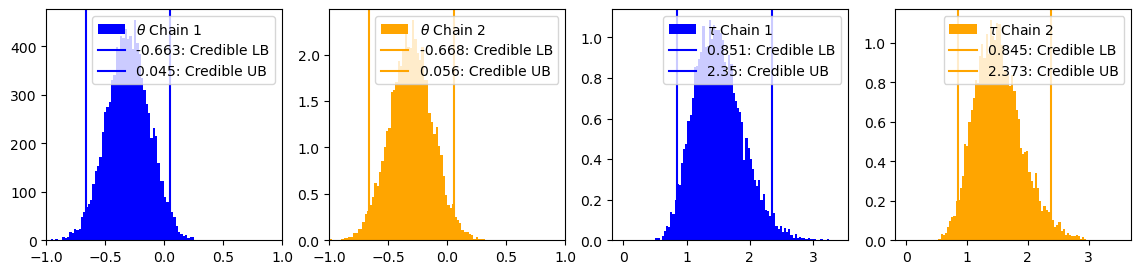

In [3]:
fig,ax = plt.subplots(1, 4, figsize=(14,3))

# Theta histograms
ax[0].hist(theta[0, :], bins = 100, color='blue', label="$\\theta$ Chain 1")
c_1 = np.quantile(theta[0, :], [0.025, 0.975]).tolist()
ax[0].axvline(x=c_1[0], color='blue', label = f'{round(c_1[0], 3)}: Credible LB')
ax[0].axvline(x=c_1[1], color='blue', label = f'{round(c_1[1], 3)}: Credible UB')
ax[0].set_xlim(-1, 1)

ax[1].hist(theta[1, :], bins = 100, density = True, color='orange', label="$\\theta$ Chain 2")
c_2 = np.quantile(theta[1, :], [0.025, 0.975]).tolist()
ax[1].axvline(x=c_2[0], color='orange', label = f'{round(c_2[0], 3)}: Credible LB')
ax[1].axvline(x=c_2[1], color='orange', label = f'{round(c_2[1], 3)}: Credible UB')
ax[1].set_xlim(-1, 1)

# Tau histograms
ax[2].hist(tau[0, :], bins = 100, density = True, color='blue', label="$\\tau$ Chain 1")
c_3 = np.quantile(tau[0, :], [0.025, 0.975]).tolist()
ax[2].axvline(x=c_3[0], color='blue', label = f'{round(c_3[0], 3)}: Credible LB')
ax[2].axvline(x=c_3[1], color='blue', label = f'{round(c_3[1], 3)}: Credible UB')

ax[3].hist(tau[1, :], bins = 100, density = True, color='orange', label="$\\tau$ Chain 2")
c_4 = np.quantile(tau[1, :], [0.025, 0.975]).tolist()
ax[3].axvline(x=c_4[0], color='orange', label = f'{round(c_4[0], 3)}: Credible LB')
ax[3].axvline(x=c_4[1], color='orange', label = f'{round(c_4[1], 3)}: Credible UB')

ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend()

# Question 2: Gibbs Sampling Proper Prior

## 1. Full conditional for Theta:

$\begin{align*}
P(\theta| \tau, x) &\propto P(\theta, \tau, x) = f(x| \theta, \tau) P(\theta, \tau) = f(x | \theta, \tau)P(\theta)P(\tau) \\ P(\theta | \tau, x) &\propto \prod_{i=1}^{n} \sqrt{\dfrac{\tau}{2\pi}} e^{-\dfrac{\tau}{2}(x_i - \theta)^2} 
\times \sqrt{\dfrac{\tau_0}{2\pi}} e^{-\dfrac{\tau_0}{2} (\theta - \theta_0)^2} \times \tau^{\dfrac{\alpha}{2} - 1}e^{-\dfrac{\lambda}{2}\tau}
\propto e^{\left(-\dfrac{\tau}{2} \sum_{i=1}^n (x_i - \theta)^2 - \dfrac{\tau_0}{2} (\theta - \theta_0)^2 \right)} \\ &\propto e^{-\dfrac{1}{2} \left[\theta^2(n\tau + \tau_0) - 2\theta(n\tau\bar{x} + \tau_0\theta_0)\right]} \propto e^{-\dfrac{n\tau + \tau_0}{2}\left[ (\theta - \tilde{\theta})^2\right]} \quad \text{where} \quad \tilde{\theta} = \frac{n\tau\bar{x} + \tau_0\theta_0}{n\tau + \tau_0} \quad \text{thus} \quad P(\theta | \tau, X) \sim N\left(\tilde{\theta}, \frac{1}{\sqrt{n\tau + \tau_0}}\right)
\end{align*}
$

## 2. Full conditional for Tau:

$P(\tau| \theta, x) \propto P(\theta, \tau, x) = f(x | \theta, \tau) P(\theta, \tau) = f(x | \theta, \tau)P(\theta)P(\tau) \\
P(\tau | \theta, X) \propto \prod_{i=1}^{n} \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}(x_i - \theta)^2} \times \tau^{\frac{\alpha}{2} - 1} e^{-\frac{\lambda}{2} \tau} \propto \tau^{\frac{n+\alpha}{2} - 1} e^{-\tau\left(\frac{\sum_{i=1}^{n}(x_i - \theta)^2 + \lambda}{2}\right)} \sim \text{Gamma}\left(\text{shape} = \frac{n + \alpha}{2}, \text{ Scale} = \frac{2}{\sum_{i=1}^{n} (x_i - \theta)^2 + \lambda}\right)$

## 3. Interpretation of $\alpha$ and $\lambda$:
We can interprete $\alpha$ as representing our prior belief for what we think the shape parameter should be. In other words $\alpha$ represents the number of data points contributed by the prior relative to the number of data points ($n$) contributed by the likelihood. The posterior for tau uses the weighted average between $\alpha$ and $n$ as its shape parameter. Similarly, we can interprete $\lambda$ as representing our prior belief for what we think the scale parameter should be. In other words $\lambda$ represents the number of data points contributed by the prior relative to the quantity $\sum_{i=1}^{n} (x_i - \theta)^2$ contributed by the likelihood. The posterior for theta uses the weighted average between $\lambda$ and $\sum_{i=1}^{n} (x_i - \theta)^2$ as its scale parameter.

## 4. Affect of Changing the Prior Hyperparameters:
Changing the prior hyperparameters adjusts the weight that the prior contributes to the posterior relative to the likelihood. The larger the values of the prior hyperparameters relative to the likelihood, the more the posterior resembles the prior. Conversely, the smaller the values of the prior hyperparameters relative to the likelihood, the more the posterior resembles the likelihood.

In [4]:
# Defining variables
n = 100; C, G, = 2, 10000  
tau_0, theta_0 = 0, 1; alpha_0, lamda_0 = 3, 3  # theta & tau prior parameter

# Normal model for the data (likelihood) 
data = stats.norm(loc=0, scale=1).rvs(1000)

# Initialize 2D arrays of zeros for theta and tau with shape (C, G)
theta, tau = np.zeros([C, G]), np.zeros([C, G])

theta[:, 0] = -0.03  # Inialize a value of theta

# Preforming Gibbs Sampling
for c in range(C):  # Iterate through each chain
    for g in range(1, G):
        # Constructing tau full conditional distribution
        tau[c, g] = stats.gamma(
            a = (n+alpha_0)/2, 
            scale = 2/(sum((data - theta[c, g-1])**2)+lamda_0)
        ).rvs()
        
        # Constructing theta full conditional distribution
        theta[c, g] = stats.norm(
            loc = (((n*tau[c, g]*data.mean())+(tau_0*theta_0))/(n*tau[c, g]+tau_0)), 
            scale = 1/sqrt(n*tau[c, g] + tau_0)
        ).rvs()    

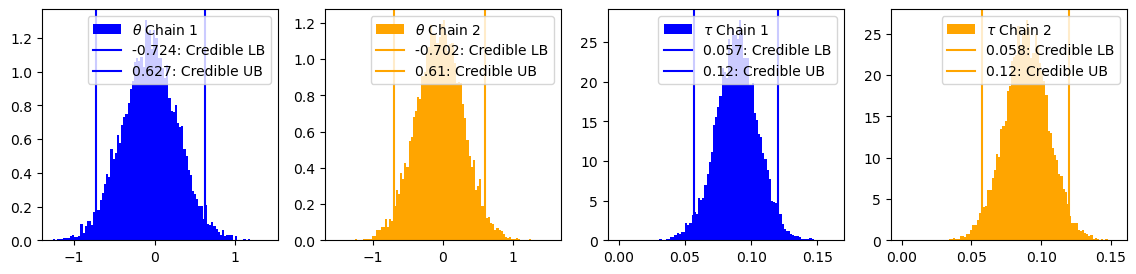

In [5]:
# Plotting 2 histograms for each chain of theta and tau:
fig,ax = plt.subplots(1, 4, figsize=(14,3))

# Theta histograms
ax[0].hist(theta[0, :], bins = 100, density = True, color='blue', label="$\\theta$ Chain 1")
c_1 = np.quantile(theta[0, :], [0.025, 0.975]).tolist()
ax[0].axvline(x=c_1[0], color='blue', label = f'{round(c_1[0], 3)}: Credible LB')
ax[0].axvline(x=c_1[1], color='blue', label = f'{round(c_1[1], 3)}: Credible UB')

ax[1].hist(theta[1, :], bins = 100, density = True, color='orange', label="$\\theta$ Chain 2")
c_2 = np.quantile(theta[1, :], [0.025, 0.975]).tolist()
ax[1].axvline(x=c_2[0], color='orange', label = f'{round(c_2[0], 3)}: Credible LB')
ax[1].axvline(x=c_2[1], color='orange', label = f'{round(c_2[1], 3)}: Credible UB')

# Tau histograms
ax[2].hist(tau[0, :], bins = 100, density = True, color='blue', label="$\\tau$ Chain 1")
c_3 = np.quantile(tau[0, :], [0.025, 0.975]).tolist()
ax[2].axvline(x=c_3[0], color='blue', label = f'{round(c_3[0], 3)}: Credible LB')
ax[2].axvline(x=c_3[1], color='blue', label = f'{round(c_3[1], 3)}: Credible UB')

ax[3].hist(tau[1, :], bins = 100, density = True, color='orange', label="$\\tau$ Chain 2")
c_4 = np.quantile(tau[1, :], [0.025, 0.975]).tolist()
ax[3].axvline(x=c_4[0], color='orange', label = f'{round(c_4[0], 3)}: Credible LB')
ax[3].axvline(x=c_4[1], color='orange', label = f'{round(c_4[1], 3)}: Credible UB')

ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend()

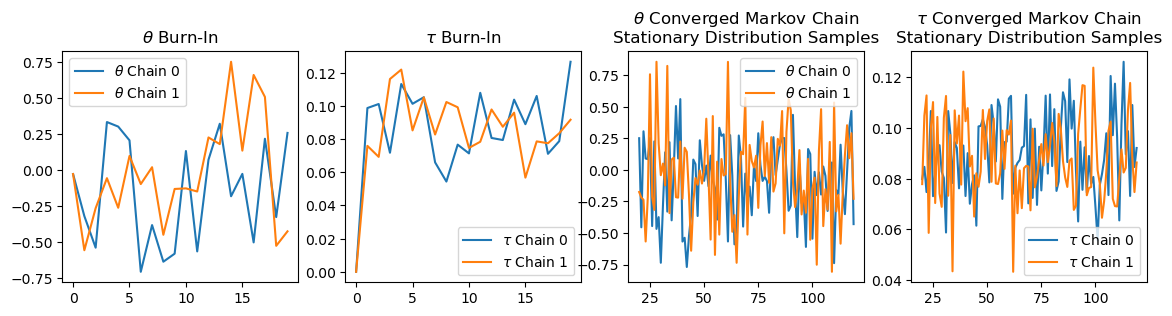

In [6]:
# Creates a figure with 4 subplots arranged in a single row 
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c)) # Burn-in for theta
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))     # Burn-in for tau
    
    # Plot stationary distribution samples for theta (ax[2]) and tau (ax[3])
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))

# Legend for graph
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend()

# Question 3: Option B

I report that when the prior is a proper distribution, the posterior is proportional to the joint distribution as suggested by Bayes' Theorem: $P(\theta|x) = \frac{P(x|\theta)P(\theta)}{P(x)} = \frac{P(\theta, x)}{P(x)} \propto P(\theta, x)$. The joint, being equivalent to the product of the likelihood and prior, serves as a means of acquiring a distribution for the posterior. Although this distribution is not normalized, it is proportional to the exact distribution of the posterior. This is all we need in Bayesian statistics, as we are interested in capturing our beliefs about where we think the values of our parameter lie using both prior knowledge and data at our disposal. Therefore all that matters is that our posterior is proportional to the exact distribution. Finally, to construct credible intervals, we will trade the functional form for histograms, which further trivializes the necessity for the proportionality constant that would normalize our density.